In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath, parse_dates=['Date'], dayfirst=True)
column_sums = df.sum()
print(column_sums)

Gas Warm Air Furnaces                                   17663826.0
Oil Warm Air Furnaces                                     168834.0
Residential Gas Automatic Storage Water Heaters         22347266.0
Residential Electric Automatic Storage Water Heaters    23212711.0
Commercial Gas Storage Water Heaters                      429497.0
Commercial Electric Storage Water Heaters                 713474.0
Unitary_Air_Conditioning                                28645961.0
Unitary_Heat_Pump                                       18396195.0
Unitary_AC_HP_sub16.5                                    1890908.0
Unitary_AC_HP_16.5-21.9                                  4654942.0
Unitary_AC_HP_22.0-26.9                                  9245470.0
Unitary_AC_HP_27.0-32.9                                  7281180.0
Unitary_AC_HP_33.0-38.9                                  9815765.0
Unitary_AC_HP_39.0-43.9                                  3497897.0
Unitary_AC_HP_44.0-53.9                                  51676

C:\Users\bober\AppData\Local\Temp\ipykernel_16996\4015132398.py:7: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_sums = df.sum()


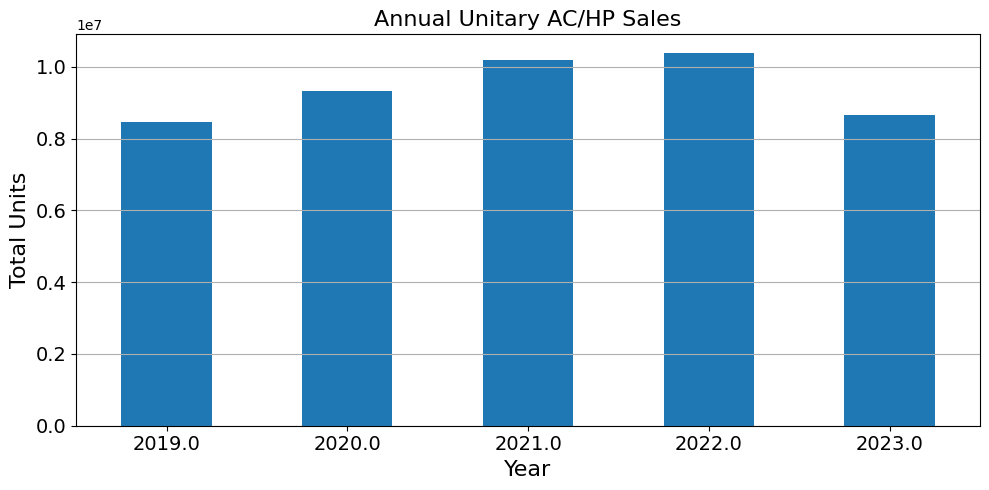

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'filepath' is the path to your CSV file
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# List of Unitary AC/HP categories
unitary_categories = [
    'Unitary_Air_Conditioning','Unitary_Heat_Pump'
]

# Sum up the values for each year for the specified categories
summed_unitary_data = df.groupby('Year')[unitary_categories].sum()
total_unitary_df = summed_unitary_data['Unitary_Air_Conditioning'] + summed_unitary_data['Unitary_Heat_Pump']

# Plotting
total_unitary_df.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Annual Unitary AC/HP Sales',fontsize=16)
plt.xticks(fontsize=14,rotation=0)
plt.yticks(fontsize=14)
plt.ylabel('Total Units',fontsize=16)
plt.xlabel('Year',fontsize=16)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

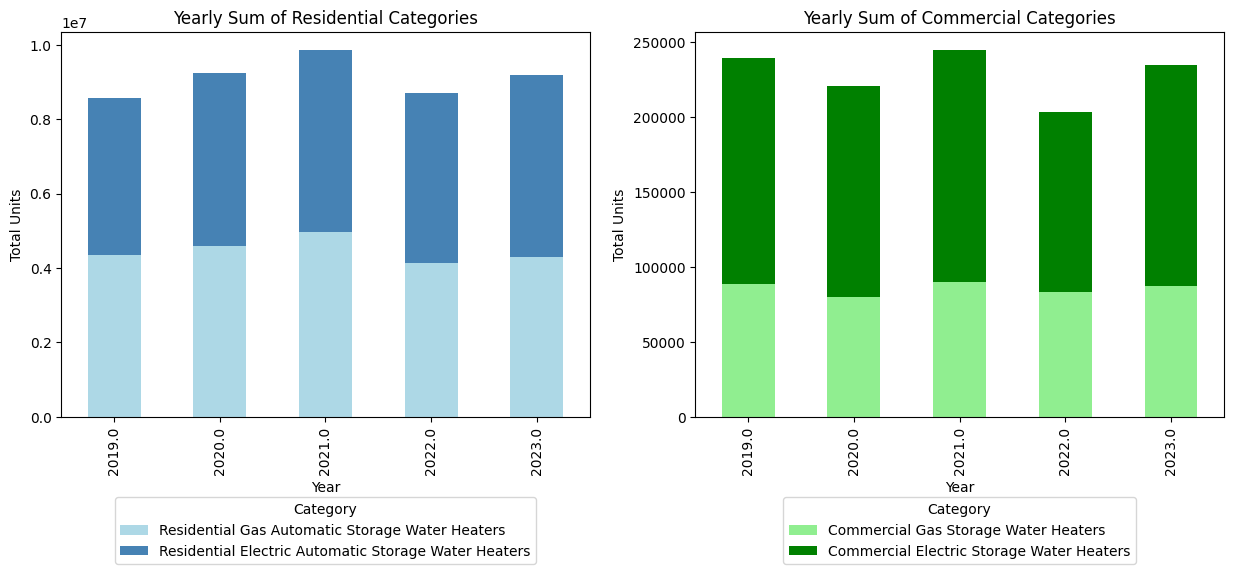

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                  'Residential Electric Automatic Storage Water Heaters', 
                                  'Commercial Gas Storage Water Heaters', 
                                  'Commercial Electric Storage Water Heaters']].sum()

residential_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                       'Residential Electric Automatic Storage Water Heaters']].sum()

commercial_data = df.groupby('Year')[['Commercial Gas Storage Water Heaters', 
                                      'Commercial Electric Storage Water Heaters']].sum()

#annual_data = df.groupby('Year')[['Gas Warm Air Furnaces']].sum()

annual_df = df.groupby('Year')[['Commercial Gas Storage Water Heaters']].sum()


# Define a color map for the categories
color_map = {
    'Residential Gas Automatic Storage Water Heaters': 'lightblue',
    'Residential Electric Automatic Storage Water Heaters': 'steelblue',
    'Commercial Gas Storage Water Heaters': 'lightgreen',
    'Commercial Electric Storage Water Heaters': 'green'
}

fig, ax = plt.subplots(1,2,figsize = (15,5))

# Residential Plot with specified colors
residential_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in residential_data.columns], ax=ax[0])
ax[0].set_title('Yearly Sum of Residential Categories')
ax[0].set_ylabel('Total Units')
ax[0].set_xlabel('Year')
ax[0].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

# Commercial Plot with specified colors
commercial_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in commercial_data.columns], ax=ax[1])
ax[1].set_title('Yearly Sum of Commercial Categories')
ax[1].set_ylabel('Total Units')
ax[1].set_xlabel('Year')
ax[1].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

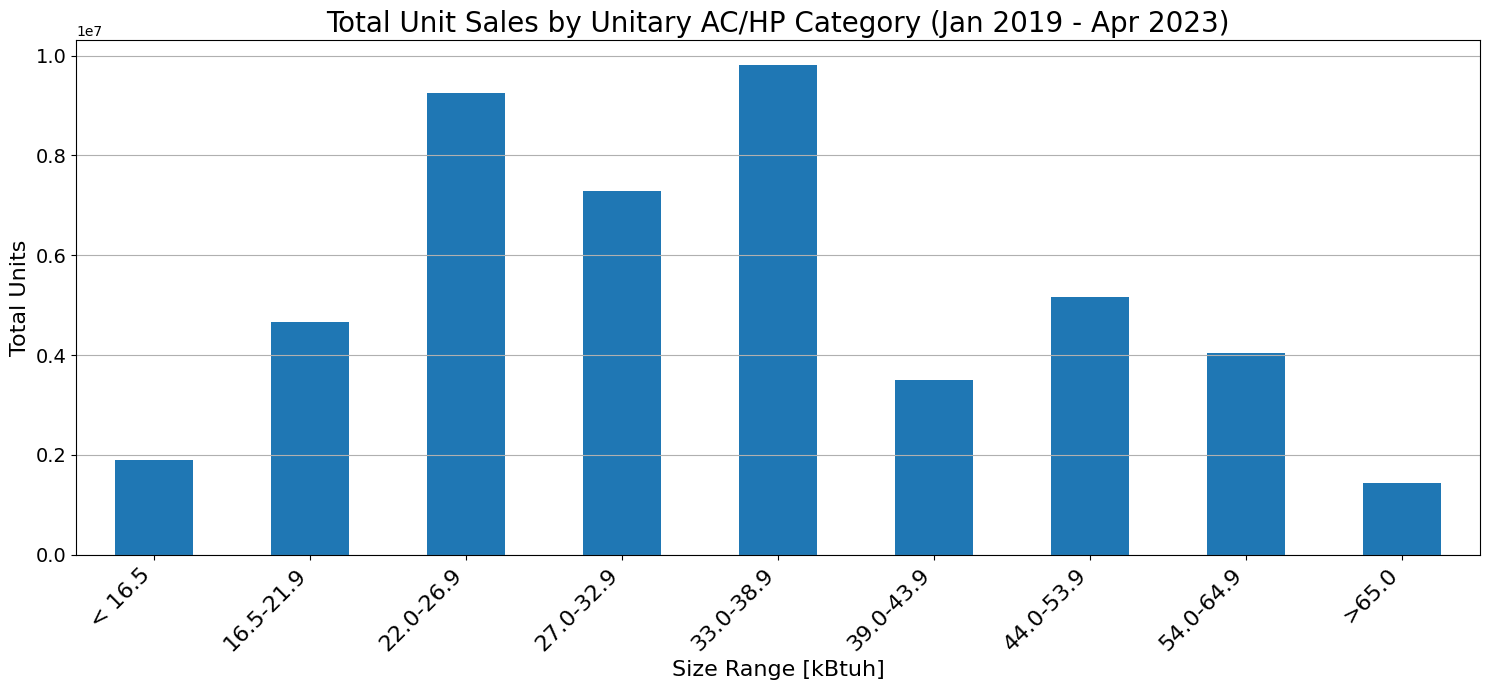

In [4]:
# Load the dataset
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# Consolidate all columns with capacities greater than 65.0 kBtuh
high_capacity_bins = ['Unitary_AC_HP_65.0-96.9',
    'Unitary_AC_HP_97.0-134.9', 'Unitary_AC_HP_135.0-184.9', 'Unitary_AC_HP_185.0-249.9',
    'Unitary_AC_HP_250.0-319.9', 'Unitary_AC_HP_320.0-379.9', 'Unitary_AC_HP_380.0-539.9',
    'Unitary_AC_HP_540.0-639.9', 'Unitary_AC_HP_640.0-799.9', 'Unitary_AC_HP_800.0-899.9',
    'Unitary_AC_HP_900.0-999.9', 'Unitary_AC_HP_1000.0-1199.9', 'Unitary_AC_HP_over1200'
]
num = 0
for name in high_capacity_bins:
    if num == 0:
        high_capacity_sum = df[name]
    else: high_capacity_sum = high_capacity_sum + df[name]
    num = num+1
high_capacity_sum = pd.DataFrame(high_capacity_sum)
high_capacity_sum.columns = ['>65.0']
df = pd.merge(df,high_capacity_sum,left_index=True,right_index=True)


# List of Unitary AC/HP categories 
unitary_categories = [
    'Unitary_AC_HP_sub16.5', 'Unitary_AC_HP_16.5-21.9', 'Unitary_AC_HP_22.0-26.9',
    'Unitary_AC_HP_27.0-32.9', 'Unitary_AC_HP_33.0-38.9', 'Unitary_AC_HP_39.0-43.9',
    'Unitary_AC_HP_44.0-53.9', 'Unitary_AC_HP_54.0-64.9', '>65.0'
]

mylabels = [
    '< 16.5', '16.5-21.9', '22.0-26.9',
    '27.0-32.9', '33.0-38.9', '39.0-43.9',
    '44.0-53.9', '54.0-64.9', '>65.0'
]
y_pos = np.arange(len(mylabels))

# Check if all categories are present in the dataset columns
available_categories = [cat for cat in unitary_categories if cat in df.columns]

# Sum the values for each category across all years
summed_categories = df[available_categories].sum()

# Plotting
summed_categories.plot(kind='bar', figsize=(15, 7))
plt.title('Total Unit Sales by Unitary AC/HP Category (Jan 2019 - Apr 2023)',fontsize=20)
plt.ylabel('Total Units',fontsize=16)
plt.xlabel('Size Range [kBtuh]',fontsize=16)
plt.xticks(y_pos,mylabels,rotation=45,fontsize=16,horizontalalignment='right') 
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

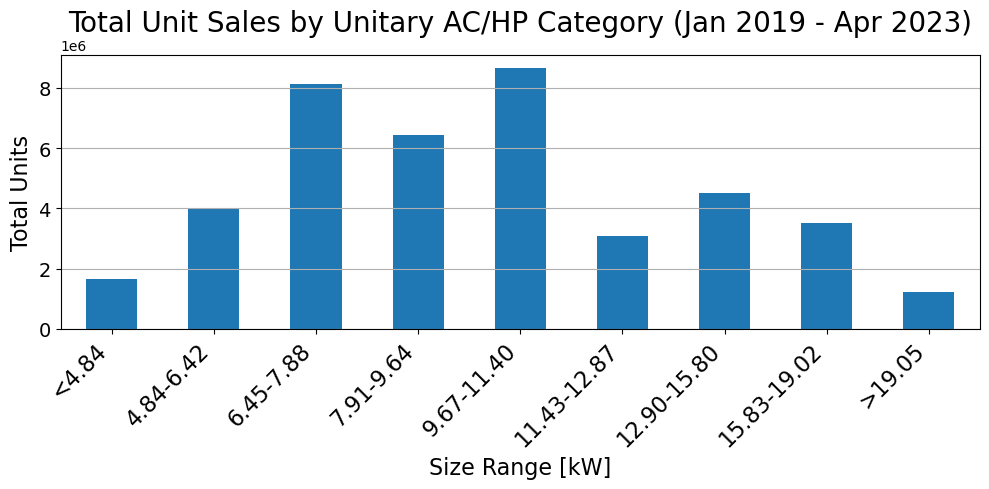

In [22]:
# Load the dataset
df = pd.read_csv(filepath)

# Convert the 'Date' column to datetime format to extract year information
df['Date'] = pd.to_datetime(df['Date'])

# Consolidate all columns with capacities greater than 65.0 kBtuh
high_capacity_bins = ['Unitary_AC_HP_65.0-96.9',
    'Unitary_AC_HP_97.0-134.9', 'Unitary_AC_HP_135.0-184.9', 'Unitary_AC_HP_185.0-249.9',
    'Unitary_AC_HP_250.0-319.9', 'Unitary_AC_HP_320.0-379.9', 'Unitary_AC_HP_380.0-539.9',
    'Unitary_AC_HP_540.0-639.9', 'Unitary_AC_HP_640.0-799.9', 'Unitary_AC_HP_800.0-899.9',
    'Unitary_AC_HP_900.0-999.9', 'Unitary_AC_HP_1000.0-1199.9', 'Unitary_AC_HP_over1200'
]
num = 0
for name in high_capacity_bins:
    if num == 0:
        high_capacity_sum = df[name]
    else: high_capacity_sum = high_capacity_sum + df[name]
    num = num+1
high_capacity_sum = pd.DataFrame(high_capacity_sum)
high_capacity_sum.columns = ['>65.0']
df = pd.merge(df,high_capacity_sum,left_index=True,right_index=True)

# Convert kBtuh bin labels to kW
conversion = 3.412142
binlabels = [
    '<'+str(format(16.5/conversion,".2f")), 
    str(format(16.5/conversion,".2f"))+'-'+str(format(21.9/conversion,".2f")), 
    str(format(22.0/conversion,".2f"))+'-'+str(format(26.9/conversion,".2f")),
    str(format(27.0/conversion,".2f"))+'-'+str(format(32.9/conversion,".2f")),
    str(format(33.0/conversion,".2f"))+'-'+str(format(38.9/conversion,".2f")),
    str(format(39.0/conversion,".2f"))+'-'+str(format(43.9/conversion,".2f")),
    str(format(44.0/conversion,".2f"))+'-'+str(format(53.9/conversion,".2f")),
    str(format(54.0/conversion,".2f"))+'-'+str(format(64.9/conversion,".2f")),
    '>'+str(format(65.0/conversion,".2f"))
]

# List of Unitary AC/HP categories 
unitary_categories = [
    'Unitary_AC_HP_sub16.5', 'Unitary_AC_HP_16.5-21.9', 'Unitary_AC_HP_22.0-26.9',
    'Unitary_AC_HP_27.0-32.9', 'Unitary_AC_HP_33.0-38.9', 'Unitary_AC_HP_39.0-43.9',
    'Unitary_AC_HP_44.0-53.9', 'Unitary_AC_HP_54.0-64.9', '>65.0'
]

y_pos = np.arange(len(binlabels))

# Check if all categories are present in the dataset columns
available_categories = [cat for cat in unitary_categories if cat in df.columns]

# Sum the values for each category across all years
summed_categories = df[available_categories].sum()

# Plotting
summed_categories.plot(kind='bar', figsize=(10, 5))
plt.title('Total Unit Sales by Unitary AC/HP Category (Jan 2019 - Apr 2023)',fontsize=20)
plt.ylabel('Total Units',fontsize=16)
plt.xlabel('Size Range [kW]',fontsize=16)
plt.xticks(y_pos,binlabels,rotation=45,fontsize=16,horizontalalignment='right') 
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

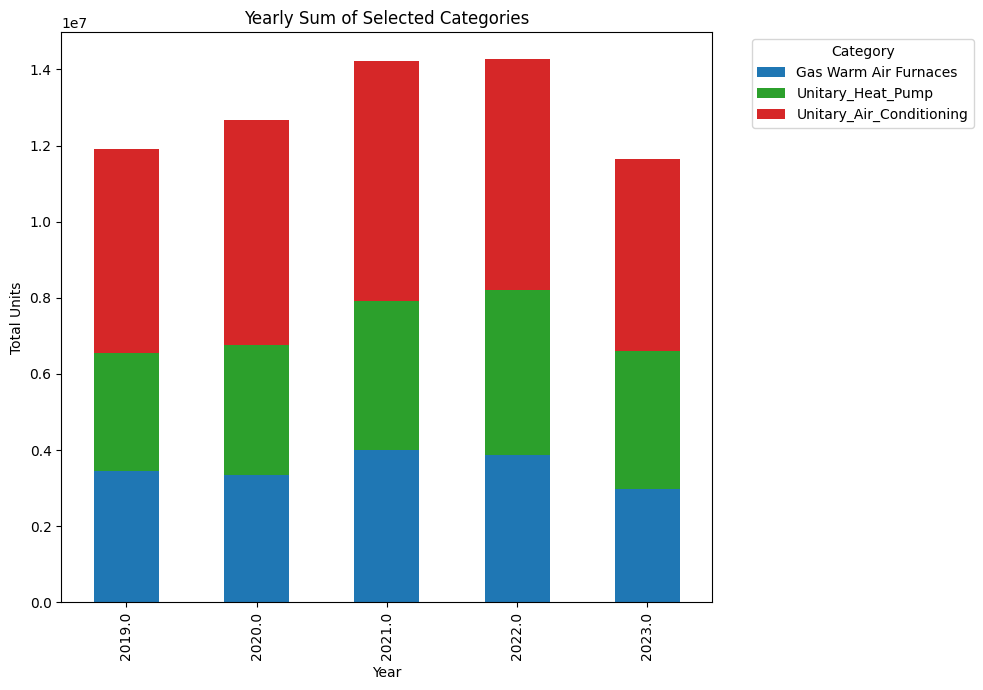

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Gas Warm Air Furnaces', 'Unitary_Heat_Pump', 'Unitary_Air_Conditioning']].sum()

# Define a color map for the categories
color_map = {
    'Gas Warm Air Furnaces': 'tab:blue',
    'Unitary_Heat_Pump': 'tab:green',
    'Unitary_Air_Conditioning': 'tab:red'
}

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

# Combined Plot with specified colors
summed_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in summed_data.columns], ax=ax)
ax.set_title('Yearly Sum of Selected Categories')
ax.set_ylabel('Total Units')
ax.set_xlabel('Year')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

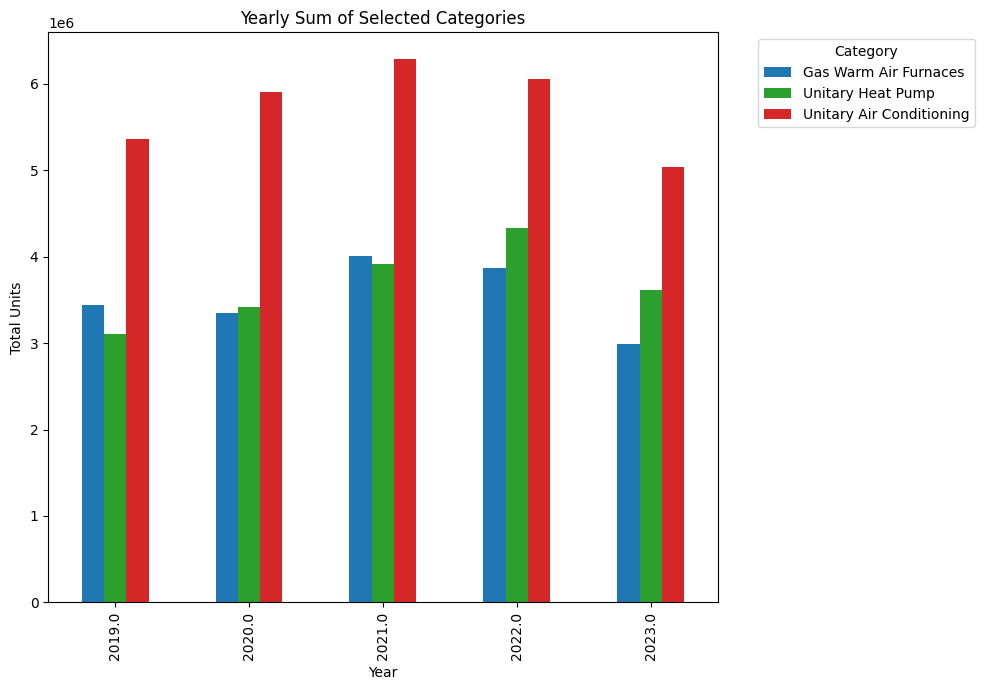

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/AHRI_no_YTD.csv'
df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Gas Warm Air Furnaces', 'Unitary_Heat_Pump', 'Unitary_Air_Conditioning']].sum()

# Define a color map for the categories
color_map = {
    'Gas Warm Air Furnaces': 'tab:blue',
    'Unitary Heat Pump': 'tab:green',
    'Unitary Air Conditioning': 'tab:red'
}

# Rename the columns to remove the underscores
summed_data.columns = ['Gas Warm Air Furnaces', 'Unitary Heat Pump', 'Unitary Air Conditioning']

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))

# Combined Plot with specified colors
summed_data.plot(kind='bar', stacked=False, color=[color_map.get(x) for x in summed_data.columns], ax=ax)
ax.set_title('Yearly Sum of Selected Categories')
ax.set_ylabel('Total Units')
ax.set_xlabel('Year')
ax.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

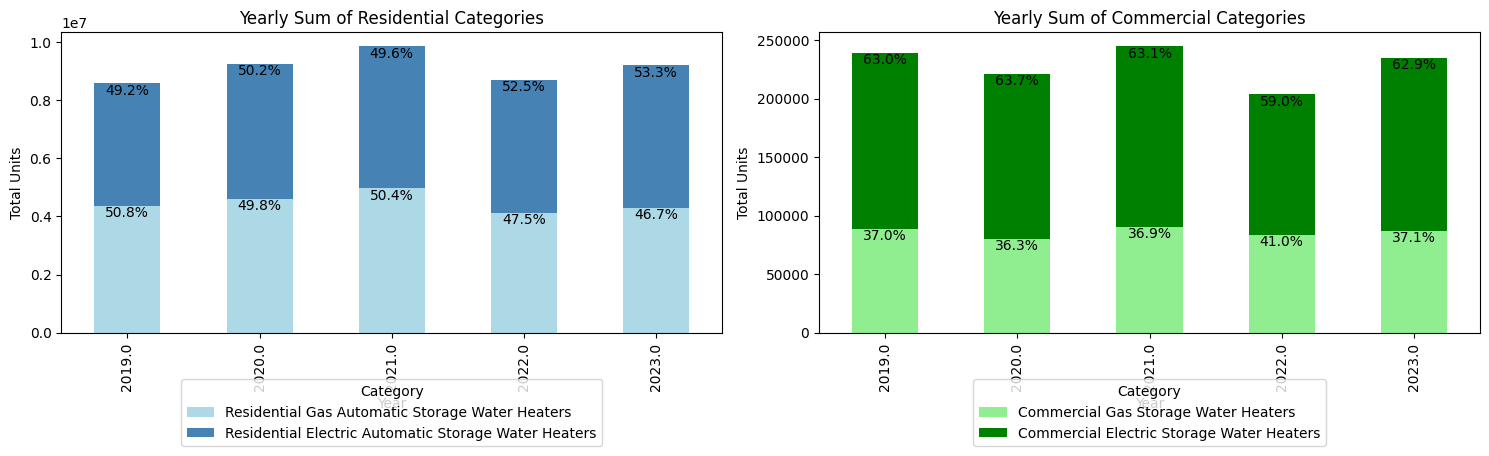

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(filepath)

df['Date'] = pd.to_datetime(df['Date'])

# Extract year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Sum up the values for each year for the specified categories
summed_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                  'Residential Electric Automatic Storage Water Heaters', 
                                  'Commercial Gas Storage Water Heaters', 
                                  'Commercial Electric Storage Water Heaters']].sum()

residential_data = df.groupby('Year')[['Residential Gas Automatic Storage Water Heaters', 
                                       'Residential Electric Automatic Storage Water Heaters']].sum()

commercial_data = df.groupby('Year')[['Commercial Gas Storage Water Heaters', 
                                      'Commercial Electric Storage Water Heaters']].sum()

# Calculate the percentage of each category for each year
residential_percentages = residential_data.div(residential_data.sum(axis=1), axis=0) * 100
commercial_percentages = commercial_data.div(commercial_data.sum(axis=1), axis=0) * 100

# Define a color map for the categories
color_map = {
    'Residential Gas Automatic Storage Water Heaters': 'lightblue',
    'Residential Electric Automatic Storage Water Heaters': 'steelblue',
    'Commercial Gas Storage Water Heaters': 'lightgreen',
    'Commercial Electric Storage Water Heaters': 'green'
}

fig, ax = plt.subplots(1,2,figsize = (15,5))

# Residential Plot with specified colors
residential_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in residential_data.columns], ax=ax[0])
ax[0].set_title('Yearly Sum of Residential Categories')
ax[0].set_ylabel('Total Units')
ax[0].set_xlabel('Year')
ax[0].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

# Add percentages on the bars
for i, year in enumerate(residential_data.index):
    for j, category in enumerate(residential_data.columns):
        percentage = residential_percentages.loc[year, category]
        ax[0].text(i, residential_data.loc[year, :].cumsum()[j], f'{percentage:.1f}%', ha='center', va='top')

# Commercial Plot with specified colors
commercial_data.plot(kind='bar', stacked=True, color=[color_map.get(x) for x in commercial_data.columns], ax=ax[1])
ax[1].set_title('Yearly Sum of Commercial Categories')
ax[1].set_ylabel('Total Units')
ax[1].set_xlabel('Year')
ax[1].legend(title='Category', bbox_to_anchor=(0.5,-0.4), loc='lower center')

# Add percentages on the bars
for i, year in enumerate(commercial_data.index):
    for j, category in enumerate(commercial_data.columns):
        percentage = commercial_percentages.loc[year, category]
        # Subtract a value from the y-coordinate to lower the position of the text
        ax[1].text(i, commercial_data.loc[year, :].cumsum()[j], f'{percentage:.1f}%', ha='center', va='top')

plt.tight_layout()
plt.show()

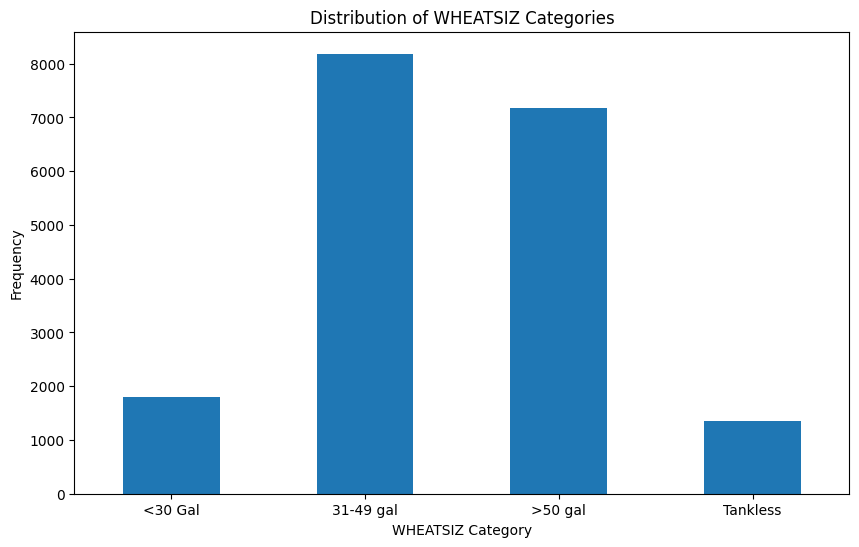

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

wheatsiz_counts = df['WHEATSIZ'].value_counts().sort_index()
index_map = {
    1: '<30 Gal',
    2: '31-49 gal',
    3: '>50 gal',
    4: 'Tankless',
}

# Replace the index values with the new labels
wheatsiz_counts.index = wheatsiz_counts.index.map(index_map)

plot = wheatsiz_counts.plot(kind='bar', title='Distribution of WHEATSIZ Categories', figsize=(10, 6))
plot.set_xlabel('WHEATSIZ Category')
plot.set_ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, '<30 Gal'),
  Text(1, 0, '31-49 gal'),
  Text(2, 0, '>50 gal'),
  Text(3, 0, 'Tankless')])

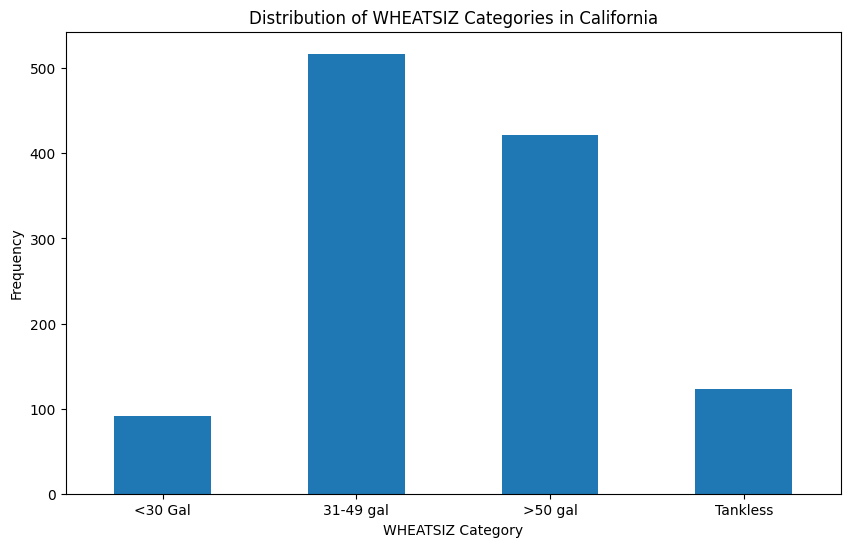

In [44]:
df_ca = df[df['state_postal'] == 'CA']

wheatsiz_counts_ca = df_ca['WHEATSIZ'].value_counts().sort_index()
index_map = {
    1: '<30 Gal',
    2: '31-49 gal',
    3: '>50 gal',
    4: 'Tankless',
}

# Replace the index values with the new labels
wheatsiz_counts_ca.index = wheatsiz_counts_ca.index.map(index_map)

plot_ca = wheatsiz_counts_ca.plot(kind='bar', title='Distribution of WHEATSIZ Categories in California', figsize=(10, 6))
plot_ca.set_xlabel('WHEATSIZ Category')
plot_ca.set_ylabel('Frequency')
plt.xticks(rotation=0)


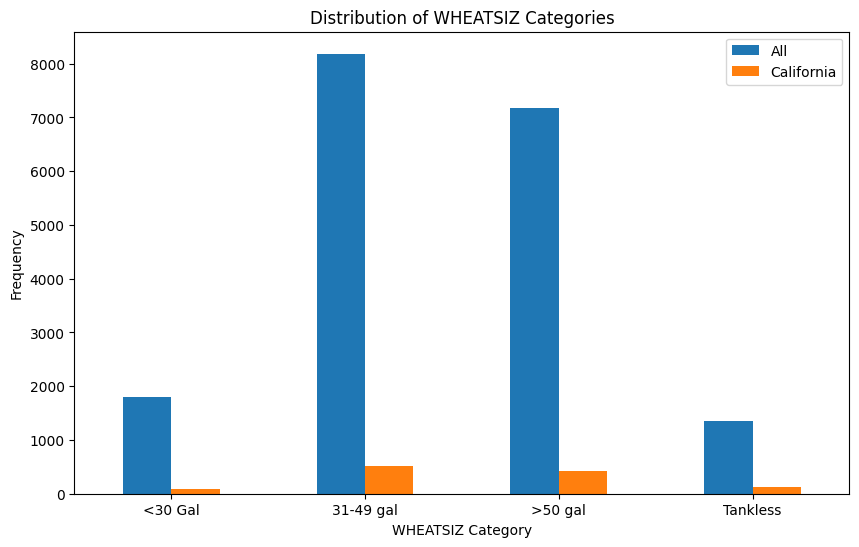

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
wheatsiz_counts = df['WHEATSIZ'].value_counts().sort_index()

# Calculate the counts for California
df_ca = df[df['state_postal'] == 'CA']
wheatsiz_counts_ca = df_ca['WHEATSIZ'].value_counts().sort_index()

index_map = {
    1: '<30 Gal',
    2: '31-49 gal',
    3: '>50 gal',
    4: 'Tankless',
}

# Replace the index values with the new labels
wheatsiz_counts.index = wheatsiz_counts.index.map(index_map)
wheatsiz_counts_ca.index = wheatsiz_counts_ca.index.map(index_map)

# Combine the two series into a single DataFrame
data = pd.DataFrame({'All': wheatsiz_counts, 'California': wheatsiz_counts_ca})

# Plot the grouped bar chart
plot = data.plot(kind='bar', title='Distribution of WHEATSIZ Categories', figsize=(10, 6))
plot.set_xlabel('WHEATSIZ Category')
plot.set_ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

Text(0, 0.5, '')

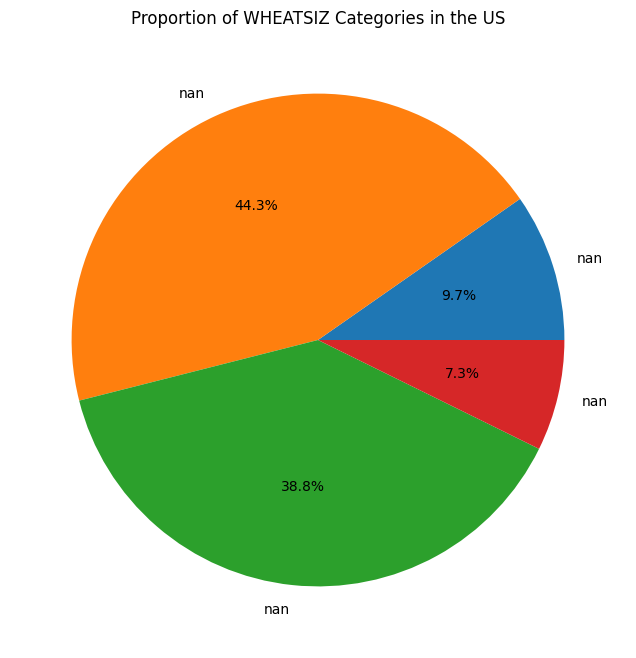

In [82]:
# Define a dictionary to map the current index values to new labels
index_map = {
    1: '<30 Gal',
    2: '31-49 gal',
    3: '>50 gal',
    4: 'Tankless',
}

# Replace the index values with the new labels
wheatsiz_counts.index = wheatsiz_counts.index.map(index_map)

pie_chart = wheatsiz_counts.plot(kind='pie', title='Proportion of WHEATSIZ Categories in the US', figsize=(8, 8), autopct='%1.1f%%')
pie_chart.set_ylabel('')


Text(0, 0.5, '')

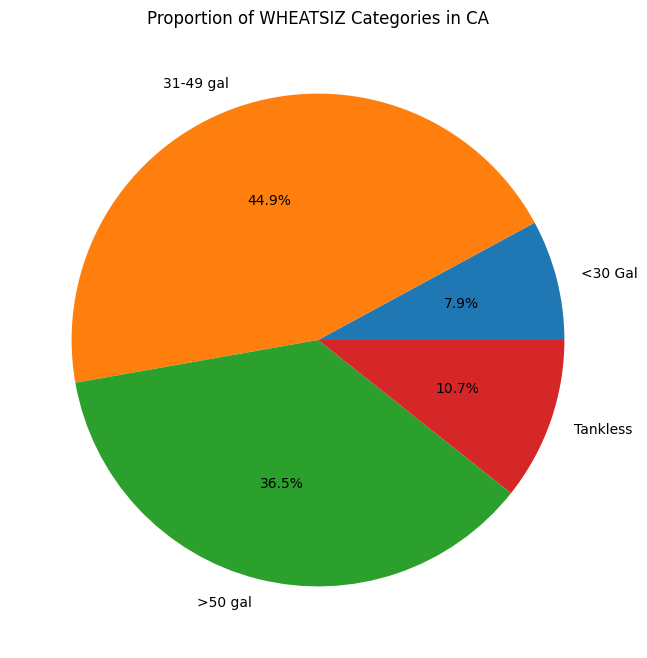

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
wheatsiz_counts = df['WHEATSIZ'].value_counts().sort_index()

# Calculate the counts for California
df_ca = df[df['state_postal'] == 'CA']
wheatsiz_counts_ca = df_ca['WHEATSIZ'].value_counts().sort_index()

index_map = {
    1: '<30 Gal',
    2: '31-49 gal',
    3: '>50 gal',
    4: 'Tankless',
}

wheatsiz_counts.index = wheatsiz_counts.index.map(index_map)
wheatsiz_counts_ca.index = wheatsiz_counts_ca.index.map(index_map)

pie_chart = wheatsiz_counts_ca.plot(kind='pie', title='Proportion of WHEATSIZ Categories in CA', figsize=(8, 8), autopct='%1.1f%%')
pie_chart.set_ylabel('')

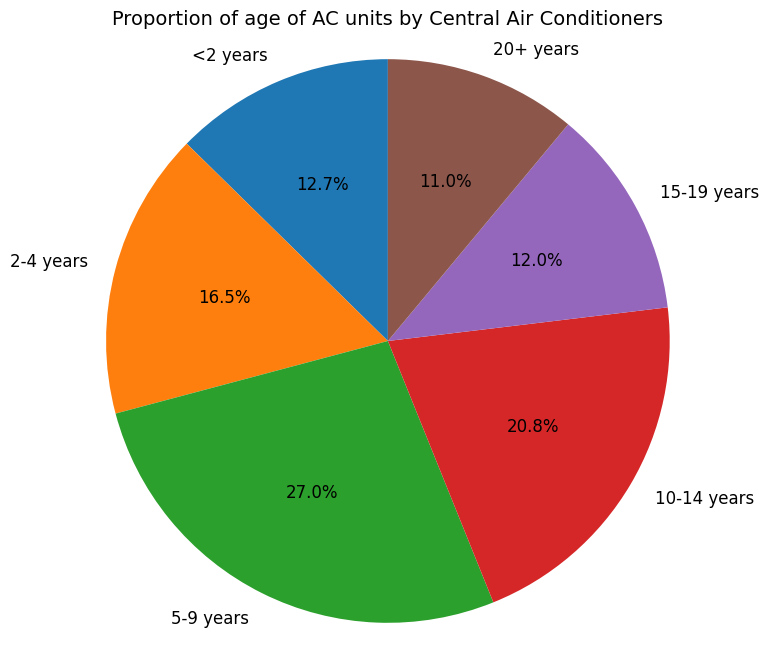

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
acequimp_counts = df['ACEQUIPAGE'].value_counts().sort_index()

df_CAC = df[df['ACEQUIPM_PUB'] == 1]
acequimp_counts_CAC = df_CAC['ACEQUIPAGE'].value_counts().sort_index()

index_map = {
    1: '<2 years',
    2: '2-4 years',
    3: '5-9 years',
    4: '10-14 years',
    5: '15-19 years',
    6: '20+ years',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
acequimp_counts.index = acequimp_counts.index.map(index_map)
acequimp_counts_CAC.index = acequimp_counts_CAC.index.map(index_map)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
labels = [textwrap.fill(label, width=15) for label in acequimp_counts_CAC.index]
ax.pie(acequimp_counts_CAC, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of age of AC units by Central Air Conditioners', fontsize=14)
plt.show()

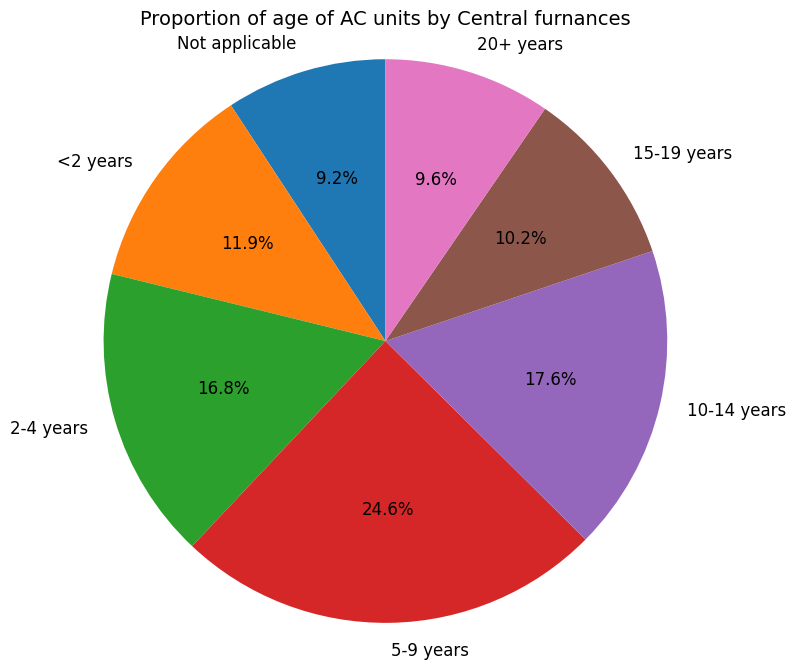

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
acequimp_counts = df['ACEQUIPAGE'].value_counts().sort_index()

df_CAC = df[df['EQUIPM'] == 3]
acequimp_counts_CAC = df_CAC['ACEQUIPAGE'].value_counts().sort_index()

index_map = {
    1: '<2 years',
    2: '2-4 years',
    3: '5-9 years',
    4: '10-14 years',
    5: '15-19 years',
    6: '20+ years',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
acequimp_counts.index = acequimp_counts.index.map(index_map)
acequimp_counts_CAC.index = acequimp_counts_CAC.index.map(index_map)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
labels = [textwrap.fill(label, width=15) for label in acequimp_counts_CAC.index]
ax.pie(acequimp_counts_CAC, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of age of AC units by Central furnances', fontsize=14)
plt.show()

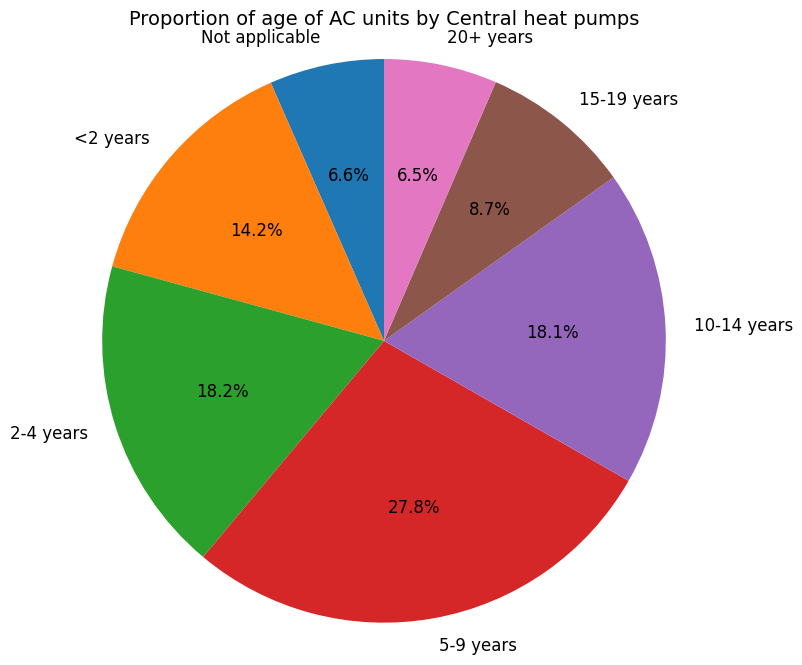

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import textwrap

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
acequimp_counts = df['ACEQUIPAGE'].value_counts().sort_index()

df_CAC = df[df['EQUIPM'] == 4]
acequimp_counts_CAC = df_CAC['ACEQUIPAGE'].value_counts().sort_index()

index_map = {
    1: '<2 years',
    2: '2-4 years',
    3: '5-9 years',
    4: '10-14 years',
    5: '15-19 years',
    6: '20+ years',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
acequimp_counts.index = acequimp_counts.index.map(index_map)
acequimp_counts_CAC.index = acequimp_counts_CAC.index.map(index_map)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
labels = [textwrap.fill(label, width=15) for label in acequimp_counts_CAC.index]
ax.pie(acequimp_counts_CAC, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of age of AC units by Central heat pumps', fontsize=14)
plt.show()

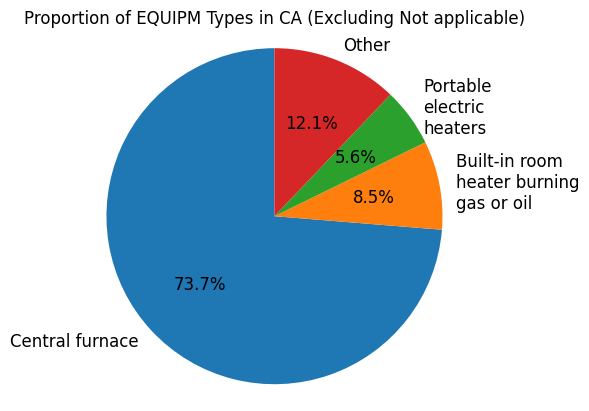

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Filter for California
df_ca = df[df['state_postal'] == 'CA']

# Calculate the counts for California dataset
EQUIPM_ca = df_ca['EQUIPM'].value_counts().sort_index()

index_map = {
    3: 'Central furnace',
    2: 'Steam/hot water system with radiators or pipes',
    4: 'Central heat pump',
    13: 'Ductless heat pump',
    5: 'Built-in electric units',
    7: 'Built-in room heater burning gas or oil',
    8: 'Wood or pellet stove',
    10: 'Portable electric heaters',
    99: 'Other',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
EQUIPM_ca.index = EQUIPM_ca.index.map(index_map)

# Remove 'Not applicable' rows
EQUIPM_ca = EQUIPM_ca.drop('Not applicable', errors='ignore')

# Calculate the total for EQUIPM_ca before combining small categories
total_ca = EQUIPM_ca.sum()

# Identify categories that make up less than 5% of the total in EQUIPM_ca
small_categories_ca = EQUIPM_ca[EQUIPM_ca / total_ca < 0.05]

# Combine these categories into a new "Other" category
if not small_categories_ca.empty:
    EQUIPM_ca = EQUIPM_ca.drop(small_categories_ca.index)
    EQUIPM_ca['Other'] = small_categories_ca.sum()

# Calculate the percentages based on the original total for EQUIPM_ca
percentages_ca = (EQUIPM_ca / total_ca) * 100

# Plotting
fig, ax = plt.subplots()
labels = [textwrap.fill(label, width=15) for label in percentages_ca.index]
ax.pie(percentages_ca, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of EQUIPM Types in CA (Excluding Not applicable)')
plt.show()


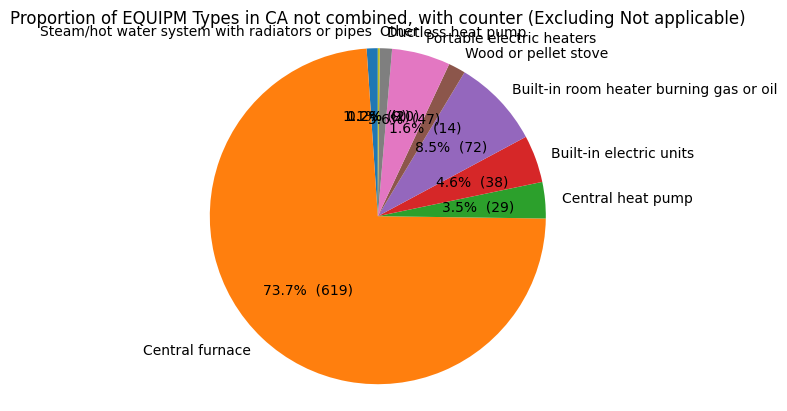

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Filter for California
df_ca = df[df['state_postal'] == 'CA']

# Calculate the counts for the California dataset
EQUIPM_ca = df_ca['EQUIPM'].value_counts().sort_index()

index_map = {
    3: 'Central furnace',
    2: 'Steam/hot water system with radiators or pipes',
    4: 'Central heat pump',
    13: 'Ductless heat pump',
    5: 'Built-in electric units',
    7: 'Built-in room heater burning gas or oil',
    8: 'Wood or pellet stove',
    10: 'Portable electric heaters',
    99: 'Other',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
EQUIPM_ca.index = EQUIPM_ca.index.map(index_map)

# Remove 'Not applicable' rows
EQUIPM_ca = EQUIPM_ca.drop('Not applicable', errors='ignore')

# Plotting without combining small categories
fig, ax = plt.subplots()
# Custom autopct to show both percentage and count
autopct = lambda p: '{:.1f}%  ({:,.0f})'.format(p, total_ca * p / 100)
ax.pie(EQUIPM_ca, labels=EQUIPM_ca.index, autopct=autopct, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of EQUIPM Types in CA not combined, with counter (Excluding Not applicable)')
plt.show()


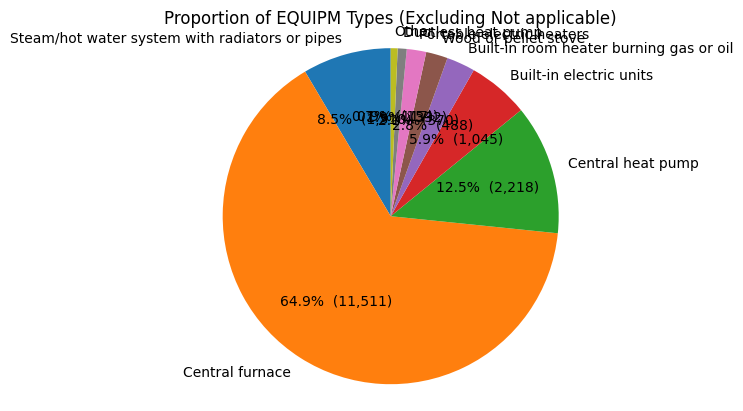

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
EQUIPM = df['EQUIPM'].value_counts().sort_index()

index_map = {
    3: 'Central furnace',
    2: 'Steam/hot water system with radiators or pipes',
    4: 'Central heat pump',
    13: 'Ductless heat pump',
    5: 'Built-in electric units',
    7: 'Built-in room heater burning gas or oil',
    8: 'Wood or pellet stove',
    10: 'Portable electric heaters',
    99: 'Other',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
EQUIPM.index = EQUIPM.index.map(index_map)

# Remove 'Not applicable' rows
EQUIPM = EQUIPM.drop('Not applicable', errors='ignore')

# Plotting without combining small categories
fig, ax = plt.subplots()
# Custom autopct to show both percentage and count
autopct = lambda p: '{:.1f}%  ({:,.0f})'.format(p, EQUIPM.sum() * p / 100)
ax.pie(EQUIPM, labels=EQUIPM.index, autopct=autopct, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of EQUIPM Types (Excluding Not applicable)')
plt.show()

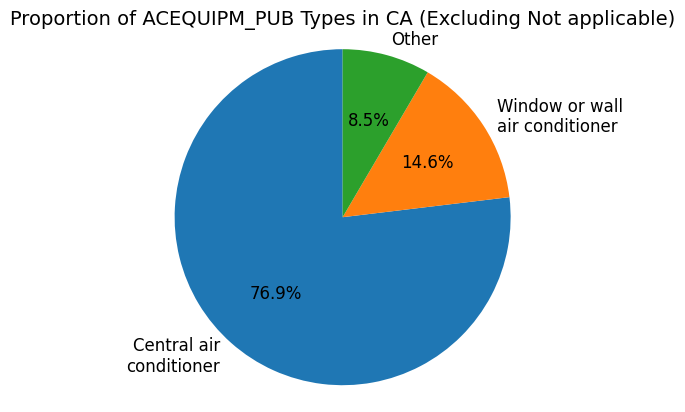

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
ace = df['ACEQUIPM_PUB'].value_counts().sort_index()
df_ca = df[df['state_postal'] == 'CA']
ace_ca = df_ca['ACEQUIPM_PUB'].value_counts().sort_index()

index_map = {
    1: 'Central air conditioner',
    3: 'Ductless heat pump',
    4: 'Window or wall air conditioner',
    5: 'Portable air conditioner',
    6: 'Evaporative or swamp cooler',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
ace.index = ace.index.map(index_map)
ace_ca.index = ace_ca.index.map(index_map)

# Remove 'Not applicable' rows
ace = ace.drop('Not applicable', errors='ignore')
ace_ca = ace_ca.drop('Not applicable', errors='ignore')

# Calculate the total for ace_ca before combining small categories
total_ca = ace_ca.sum()

# Identify categories that make up less than 5% of the total in ace_ca
small_categories_ca = ace_ca[ace_ca / total_ca < 0.05]

# Combine these categories into a new "Other" category
if not small_categories_ca.empty:
    ace_ca = ace_ca.drop(small_categories_ca.index)
    ace_ca['Other'] = small_categories_ca.sum()

# Calculate the percentages based on the original total for ace_ca
percentages_ca = (ace_ca / total_ca) * 100

# Plotting
fig, ax = plt.subplots()
labels = [textwrap.fill(label, width=15) for label in percentages_ca.index]
ax.pie(percentages_ca, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of ACEQUIPM_PUB Types in CA (Excluding Not applicable)', fontsize=14)
plt.show()


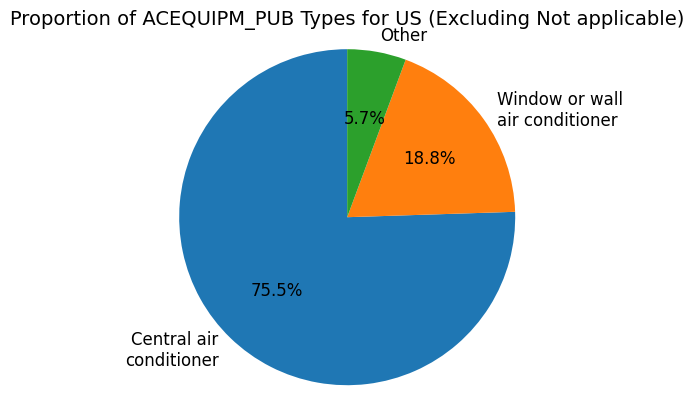

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap

filepath = 'https://raw.githubusercontent.com/JadenFaste/AHRIData/main/recs2020_public_v7.csv'
df = pd.read_csv(filepath)

# Calculate the counts for the whole dataset
ace = df['ACEQUIPM_PUB'].value_counts().sort_index()

index_map = {
    1: 'Central air conditioner',
    3: 'Ductless heat pump',
    4: 'Window or wall air conditioner',
    5: 'Portable air conditioner',
    6: 'Evaporative or swamp cooler',
    -2: 'Not applicable'
}

# Replace the index values with the new labels
ace.index = ace.index.map(index_map)

# Remove 'Not applicable' rows
ace = ace.drop('Not applicable', errors='ignore')

# Calculate the total for ace before combining small categories
total = ace.sum()

# Identify categories that make up less than 5% of the total in ace
small_categories = ace[ace / total < 0.05]

# Combine these categories into a new "Other" category
if not small_categories.empty:
    ace = ace.drop(small_categories.index)
    ace['Other'] = small_categories.sum()

# Calculate the percentages based on the original total for ace
percentages = (ace / total) * 100

# Plotting
fig, ax = plt.subplots()
labels = [textwrap.fill(label, width=15) for label in percentages.index]
ax.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90, labeldistance=1.1, textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of ACEQUIPM_PUB Types for US (Excluding Not applicable)', fontsize=14)
plt.show()